<a href="https://colab.research.google.com/github/CarlTeapot/Walmart-Recruiting/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install mlflow==2.2.2
!pip install dagshub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 39.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found exi

^C


In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt

od.download("https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: matearevadze
Your Kaggle Key: ··········


100%|██████████| 2.70M/2.70M [00:00<00:00, 510MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [2]:

train_data = "train.csv"
feature_data="features.csv"

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')


train_df=pd.read_csv("/content/walmart-recruiting-store-sales-forecasting/train.csv.zip")

feature_df=pd.read_csv("/content/walmart-recruiting-store-sales-forecasting/features.csv.zip")
store_df=pd.read_csv("/content/walmart-recruiting-store-sales-forecasting/stores.csv")



train_df=pd.merge(train_df, store_df, on='Store')
train_df=pd.merge(train_df, feature_df, on=['Store','Date'])


In [3]:
train_df = train_df.drop(columns=['IsHoliday_y'])

train_df = train_df.rename(columns={'IsHoliday_x': 'IsHoliday'})
train_df['IsHoliday'] = train_df['IsHoliday'].astype(int)


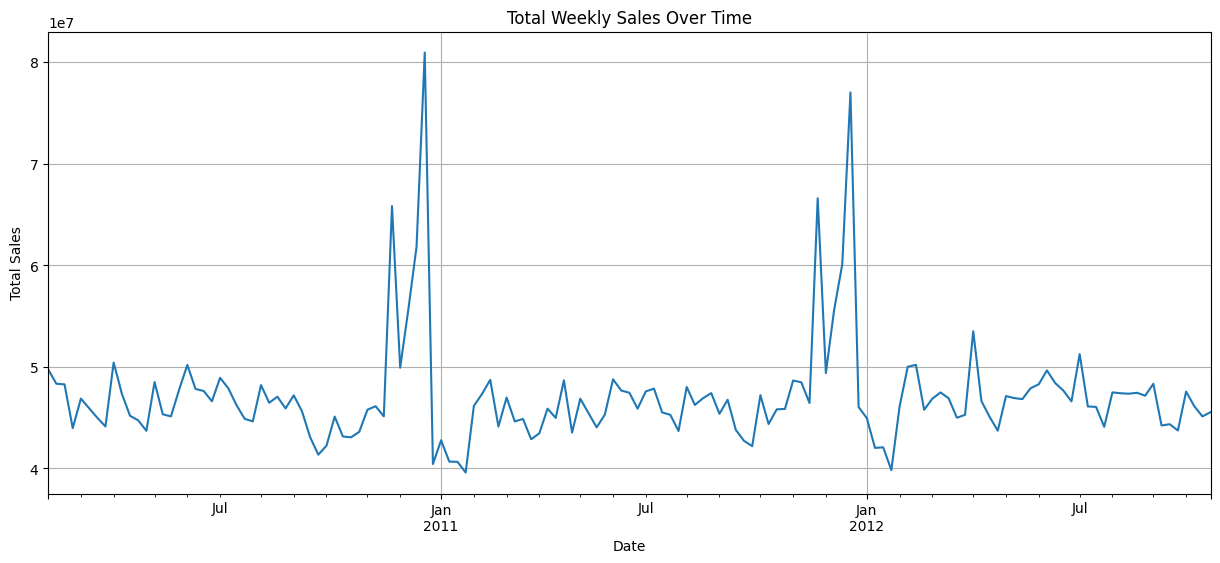

In [4]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

plt.figure(figsize=(15, 6))
train_df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

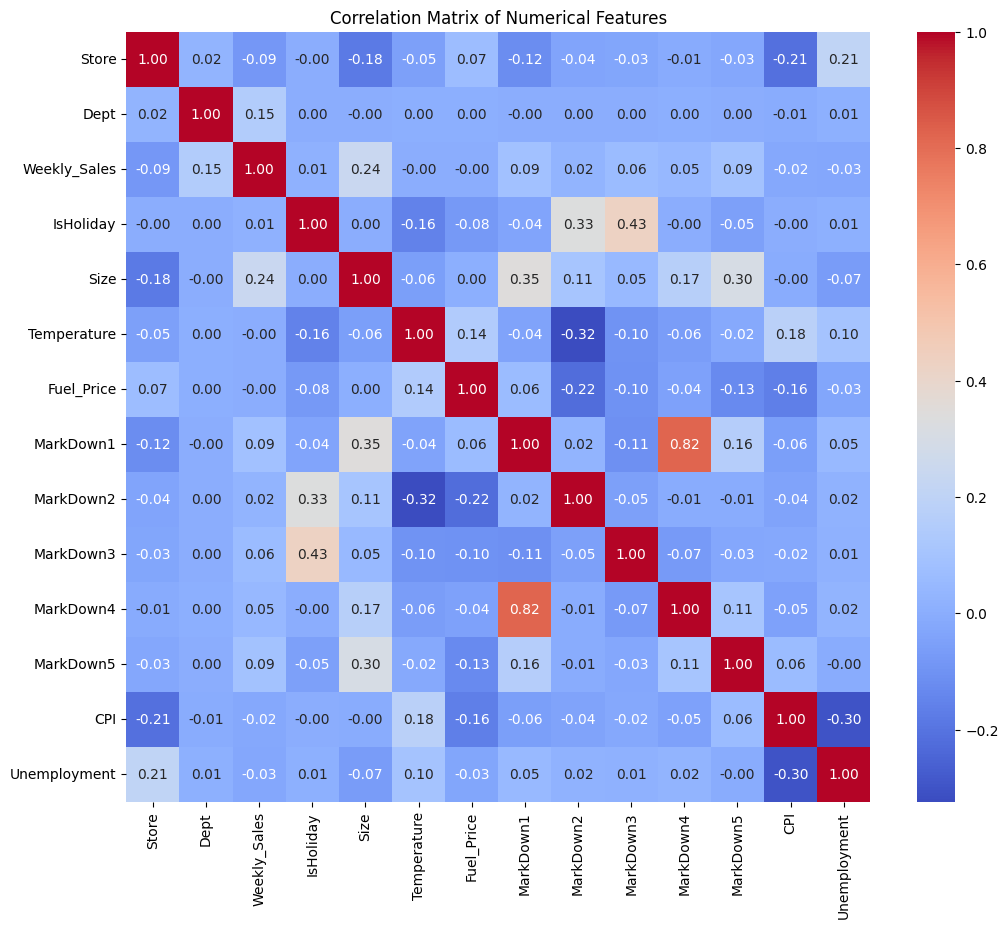

In [5]:

# Select only numeric columns for the correlation matrix
numeric_df = train_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [6]:
# Count rows with negative or zero sales
negative_sales_count = train_df[train_df['Weekly_Sales'] <= 0].shape[0]
total_rows = train_df.shape[0]
percentage_negative_sales = (negative_sales_count / total_rows) * 100
print(f"Number of rows with negative or zero sales: {negative_sales_count}")
print(f"Percentage of rows with negative or zero sales: {percentage_negative_sales:.2f}%")

Number of rows with negative or zero sales: 1358
Percentage of rows with negative or zero sales: 0.32%


In [7]:
negative_sales_df = train_df[train_df['Weekly_Sales'] < 0].copy()
display(negative_sales_df)

# Calculate the percentage of IsHoliday being true for negative sales
holiday_negative_sales = negative_sales_df['IsHoliday'].sum()
total_negative_sales = len(negative_sales_df)
percentage_holiday_negative = (holiday_negative_sales / total_negative_sales) * 100
print(f"Percentage of negative sales on a holiday: {percentage_holiday_negative:.2f}%")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
846,1,6,2012-08-10,-139.65,0,A,151315,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908
2384,1,18,2012-05-04,-1.27,0,A,151315,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143
6048,1,47,2010-02-19,-863.00,0,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
6049,1,47,2010-03-12,-698.00,0,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6051,1,47,2010-10-08,-58.00,0,A,151315,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,1,B,118221,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992
419598,45,80,2010-02-19,-0.27,0,B,118221,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992
419603,45,80,2010-04-16,-1.61,0,B,118221,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899
419614,45,80,2010-07-02,-0.27,0,B,118221,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743


Percentage of negative sales on a holiday: 7.63%


In [8]:
store_dept_sales = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].mean().reset_index()

sorted_sales = store_dept_sales.sort_values(by='Weekly_Sales', ascending=True)

display(sorted_sales.head(10))

,Store,Dept,Weekly_Sales
43,1,47,-116.454545
2623,35,47,-99.088333
3299,45,47,-88.420000
2546,34,47,-78.919167
722,10,47,-64.694444
3115,42,71,-58.445000
1186,16,47,-57.726667
1726,23,47,-45.958333
876,12,47,-43.899091
3116,42,72,-43.211786


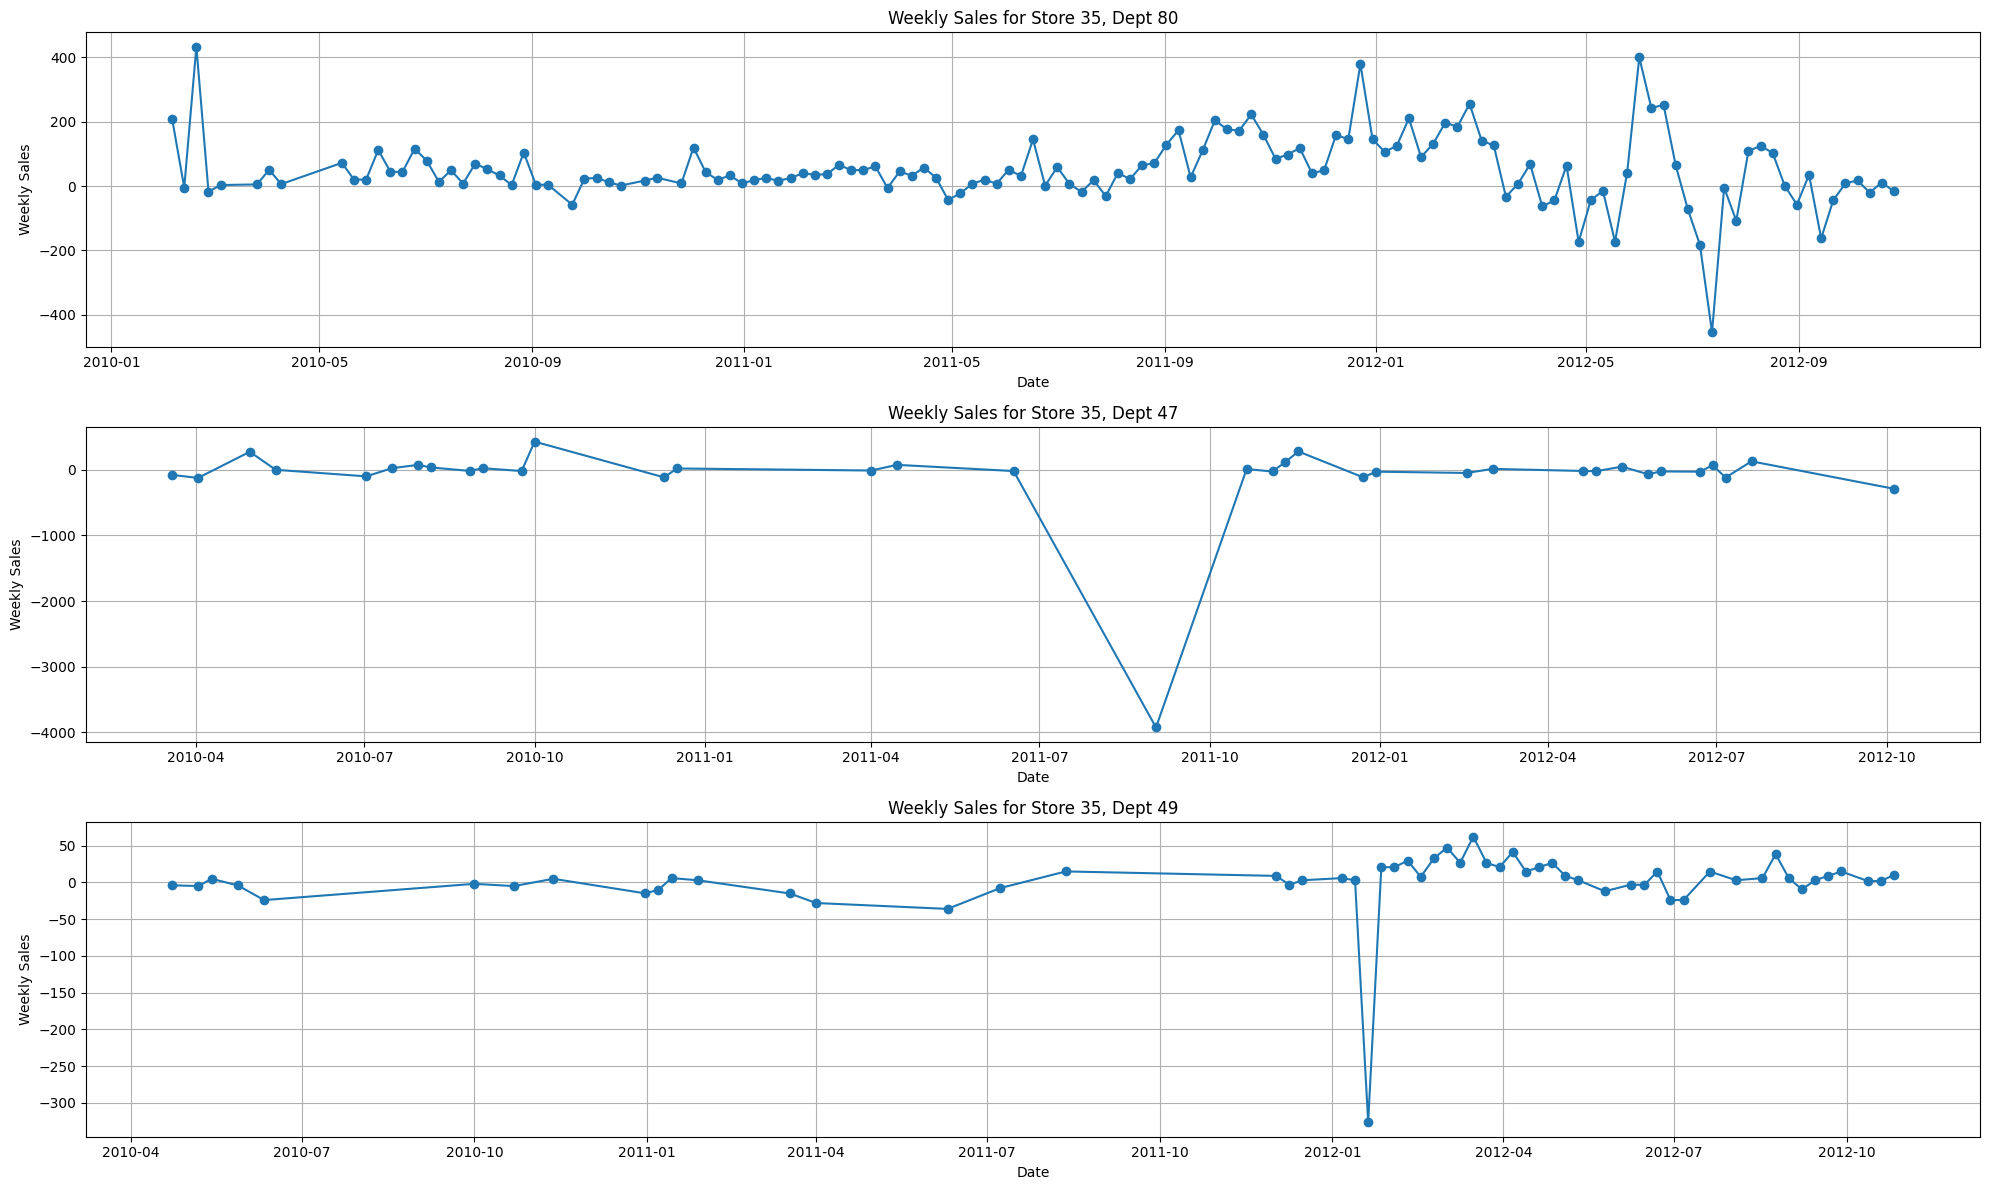

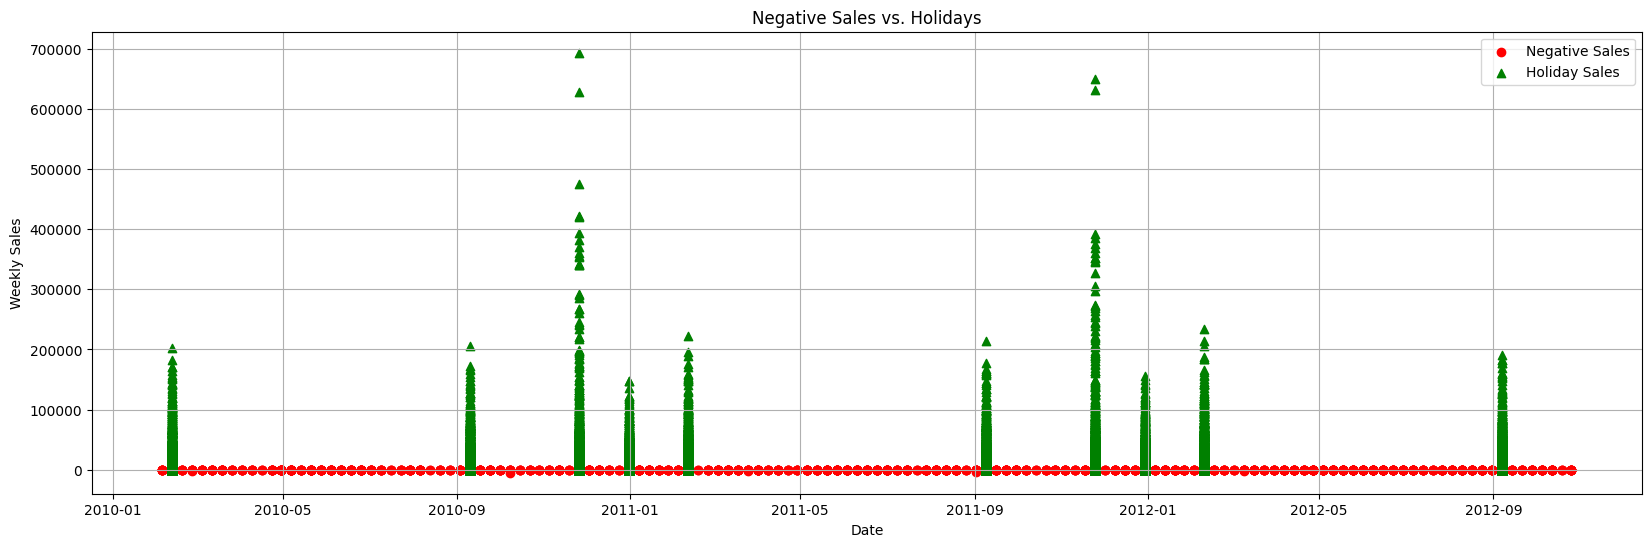


**Summary of Findings:**

*   **Refund Pattern**: The plots of weekly sales for store-department pairs with the most negative sales show that negative sales often occur in close proximity to larger positive sales. This suggests that the negative values are likely due to customer returns or refunds.
*   **Holiday Pattern**: The timeline plot of negative sales and holidays does not show a strong correlation. Negative sales appear to be distributed throughout the year, not just after major holidays.

**Conclusion:** The analysis suggests that the negative sales values are more likely to be refunds rather than being directly related to holiday sales events.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Isolate Negative Sales Data
negative_sales_df = train_df[train_df['Weekly_Sales'] < 0].copy()

# 2. Analyze Refund Pattern
# Get the top 3 store-department pairs with the most negative sales
top_negative_pairs = negative_sales_df.groupby(['Store', 'Dept']).size().nlargest(3).index

plt.figure(figsize=(20, 12))
for i, (store, dept) in enumerate(top_negative_pairs, 1):
    plt.subplot(3, 1, i)
    store_dept_df = train_df[(train_df['Store'] == store) & (train_df['Dept'] == dept)]
    plt.plot(store_dept_df['Date'], store_dept_df['Weekly_Sales'], marker='o', linestyle='-')
    plt.title(f'Weekly Sales for Store {store}, Dept {dept}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Analyze Holiday Pattern
plt.figure(figsize=(20, 6))
plt.scatter(negative_sales_df['Date'], negative_sales_df['Weekly_Sales'], color='red', label='Negative Sales')
holidays = train_df[train_df['IsHoliday'] == 1]
plt.scatter(holidays['Date'], holidays['Weekly_Sales'], color='green', marker='^', label='Holiday Sales')
plt.title('Negative Sales vs. Holidays')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

# 4. Summarize Findings
print("""
**Summary of Findings:**

*   **Refund Pattern**: The plots of weekly sales for store-department pairs with the most negative sales show that negative sales often occur in close proximity to larger positive sales. This suggests that the negative values are likely due to customer returns or refunds.
*   **Holiday Pattern**: The timeline plot of negative sales and holidays does not show a strong correlation. Negative sales appear to be distributed throughout the year, not just after major holidays.

**Conclusion:** The analysis suggests that the negative sales values are more likely to be refunds rather than being directly related to holiday sales events.
""")

In [10]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['weeklySales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

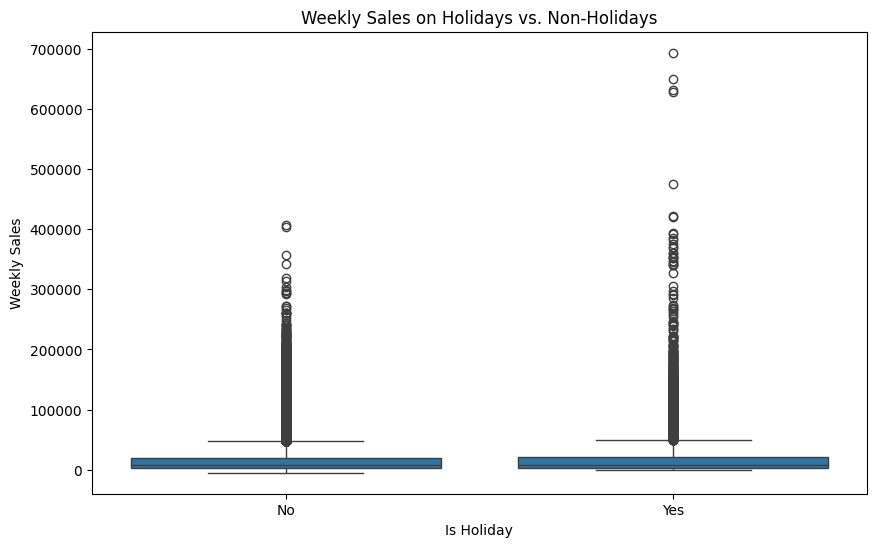

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train_df)
plt.title('Weekly Sales on Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

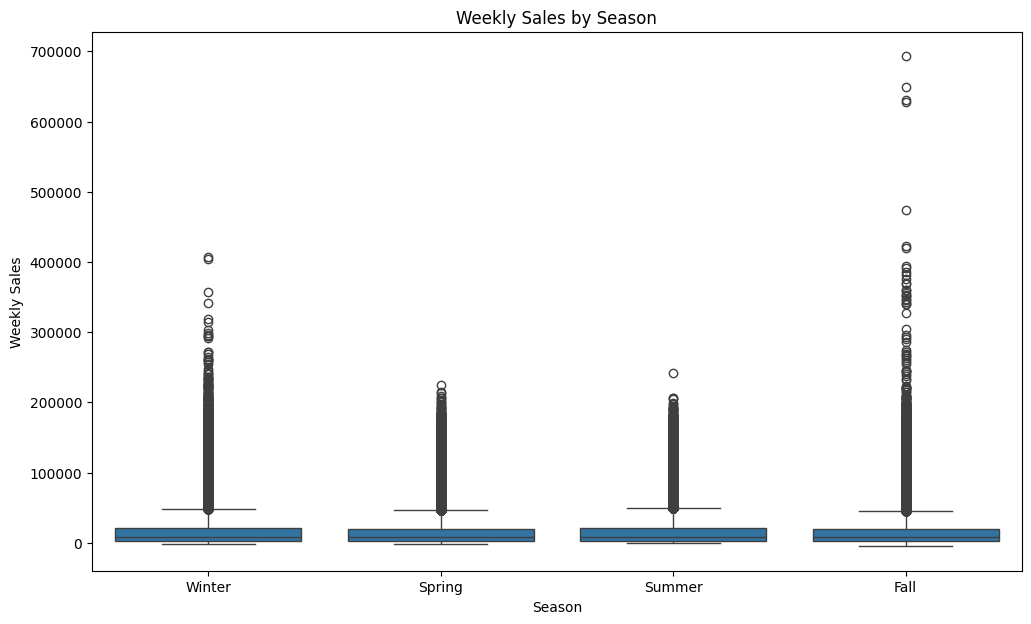

In [12]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

train_df['Season'] = train_df['Date'].dt.month.apply(get_season)

plt.figure(figsize=(12, 7))
sns.boxplot(x='Season', y='Weekly_Sales', data=train_df)
plt.title('Weekly Sales by Season')
plt.xlabel('Season')
plt.ylabel('Weekly Sales')
plt.show()

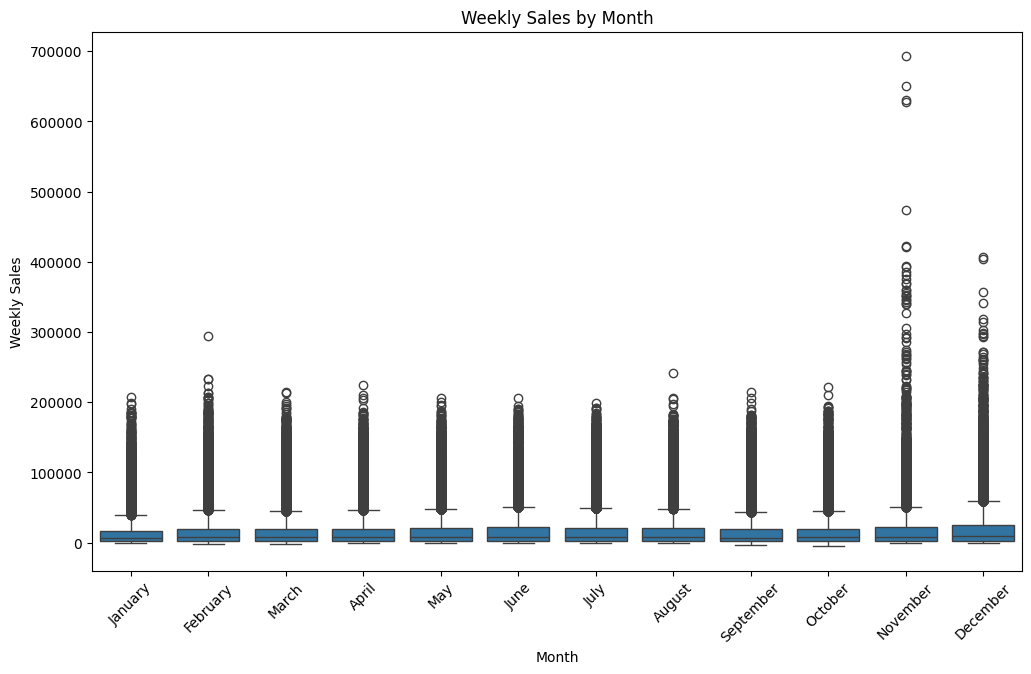

In [13]:
import calendar

train_df['Month'] = train_df['Date'].dt.month

plt.figure(figsize=(12, 7))
sns.boxplot(x='Month', y='Weekly_Sales', data=train_df)
plt.title('Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.xticks(ticks=range(12), labels=[calendar.month_name[i+1] for i in range(12)], rotation=45)
plt.show()

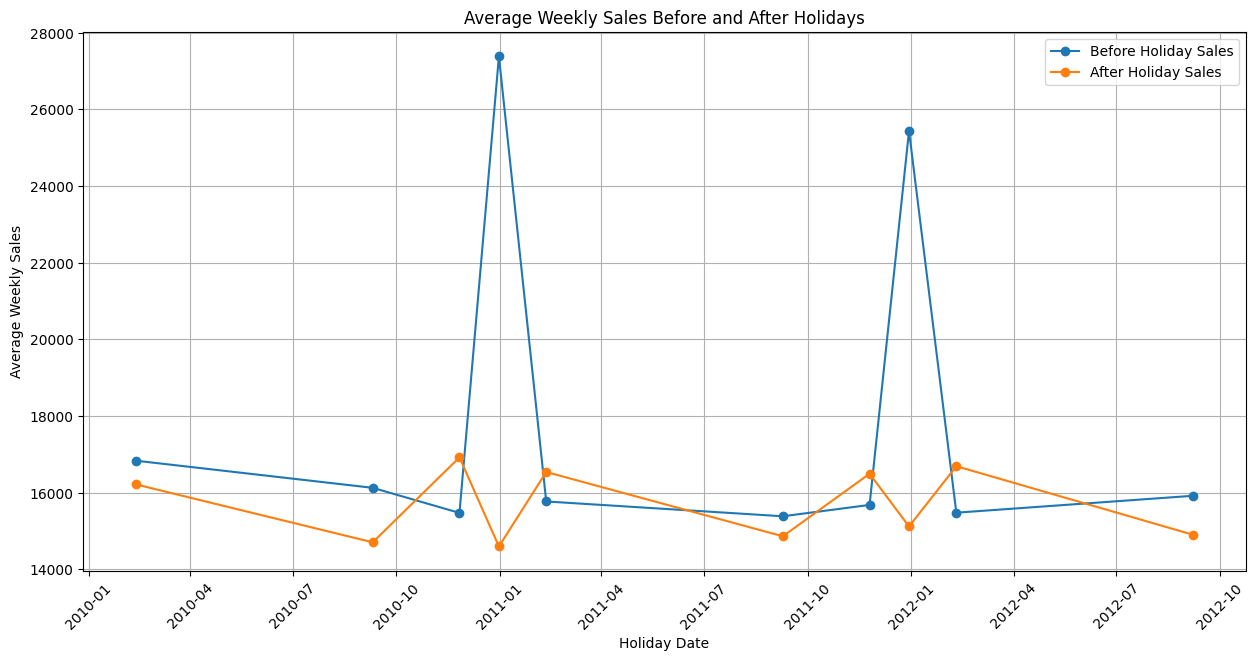

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify holiday dates
holiday_dates = train_df[train_df['IsHoliday'] == 1]['Date'].unique()

# Define a window for before and after holidays (e.g., 7 days)
window = 7
before_holiday_sales = []
after_holiday_sales = []

for holiday_date in holiday_dates:
    # Calculate the start and end dates for the 'before' period
    before_start = holiday_date - pd.Timedelta(days=window)
    before_end = holiday_date - pd.Timedelta(days=1)

    # Calculate the start and end dates for the 'after' period
    after_start = holiday_date + pd.Timedelta(days=1)
    after_end = holiday_date + pd.Timedelta(days=window)

    # Get the sales data for the 'before' and 'after' periods
    before_sales = train_df[(train_df['Date'] >= before_start) & (train_df['Date'] <= before_end)]['Weekly_Sales'].mean()
    after_sales = train_df[(train_df['Date'] >= after_start) & (train_df['Date'] <= after_end)]['Weekly_Sales'].mean()

    before_holiday_sales.append(before_sales)
    after_holiday_sales.append(after_sales)

# Create a DataFrame for plotting
holiday_sales_df = pd.DataFrame({
    'Holiday': holiday_dates,
    'Before_Holiday_Sales': before_holiday_sales,
    'After_Holiday_Sales': after_holiday_sales
})

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(holiday_sales_df['Holiday'], holiday_sales_df['Before_Holiday_Sales'], marker='o', linestyle='-', label='Before Holiday Sales')
plt.plot(holiday_sales_df['Holiday'], holiday_sales_df['After_Holiday_Sales'], marker='o', linestyle='-', label='After Holiday Sales')
plt.title('Average Weekly Sales Before and After Holidays')
plt.xlabel('Holiday Date')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

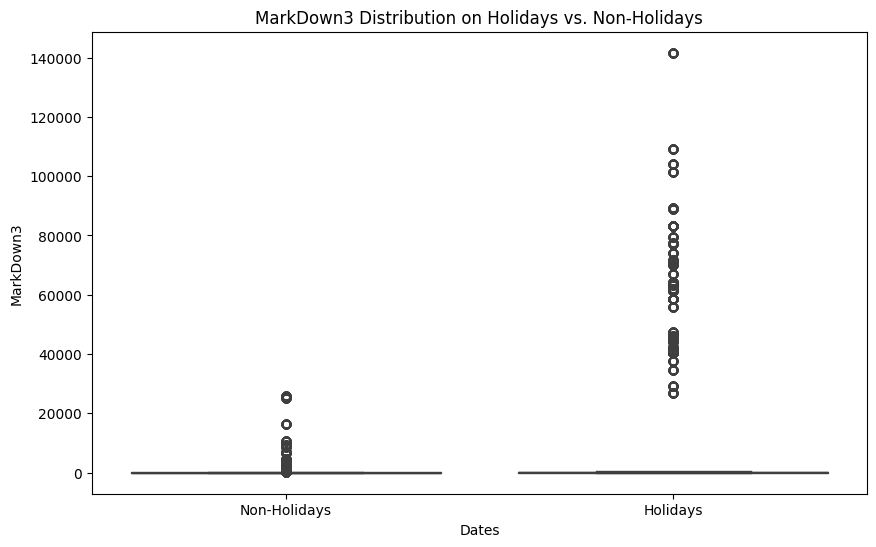

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='MarkDown3', data=train_df)
plt.title('MarkDown3 Distribution on Holidays vs. Non-Holidays')
plt.xlabel('Dates')
plt.ylabel('MarkDown3')
plt.xticks([0, 1], ['Non-Holidays', 'Holidays'])
plt.show()

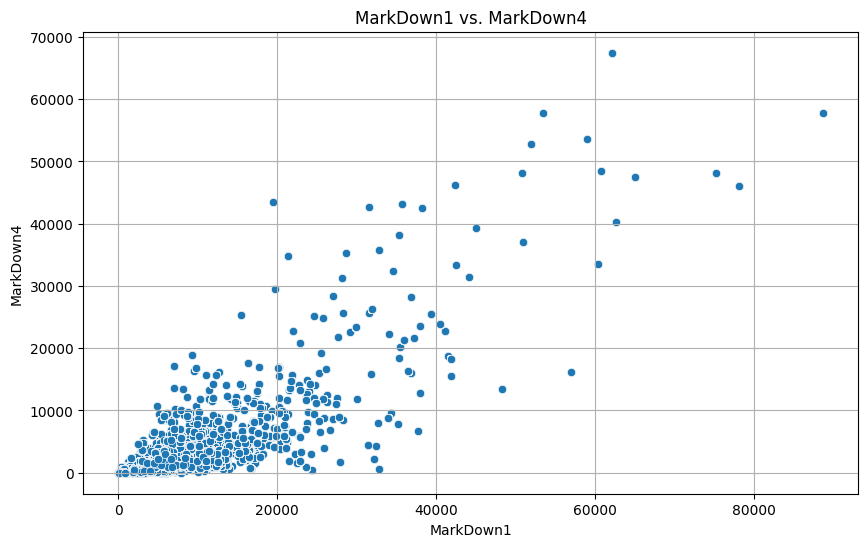

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarkDown1', y='MarkDown4', data=train_df)
plt.title('MarkDown1 vs. MarkDown4')
plt.xlabel('MarkDown1')
plt.ylabel('MarkDown4')
plt.grid(True)
plt.show()

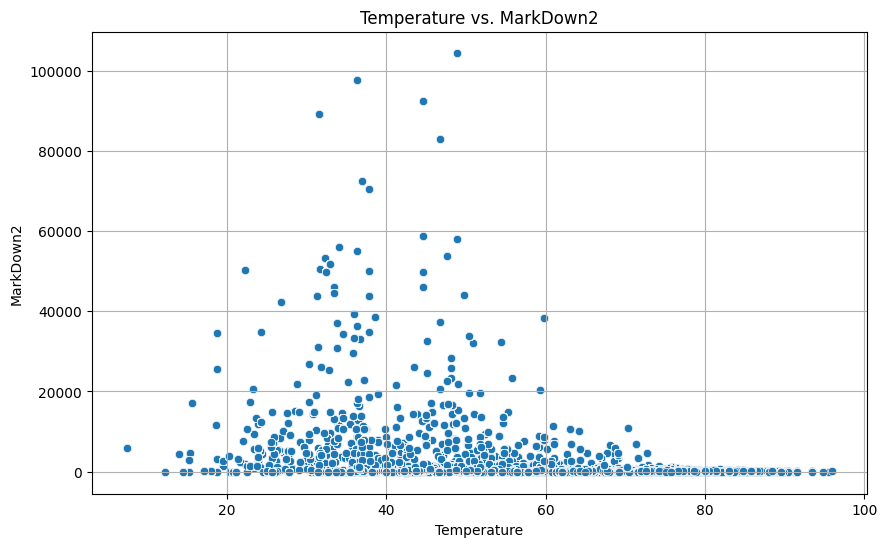

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='MarkDown2', data=train_df)
plt.title('Temperature vs. MarkDown2')
plt.xlabel('Temperature')
plt.ylabel('MarkDown2')
plt.grid(True)
plt.show()

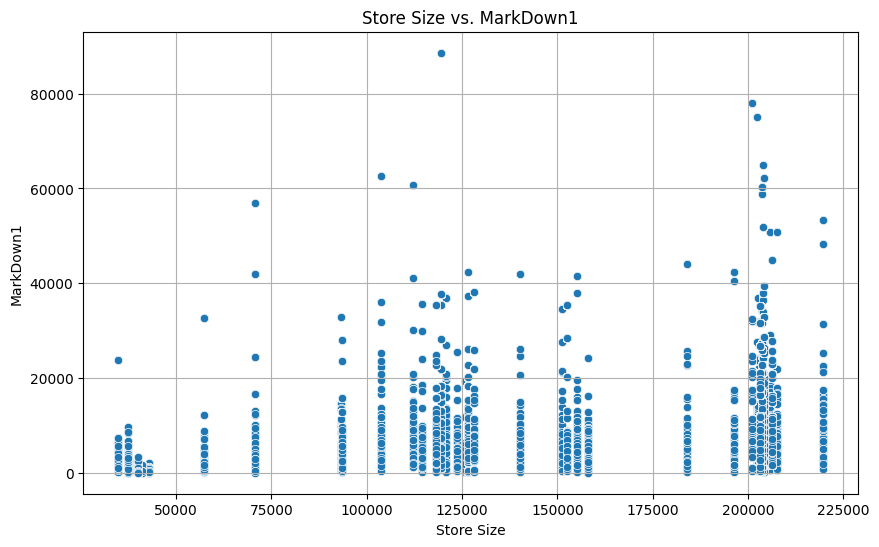

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='MarkDown1', data=train_df)
plt.title('Store Size vs. MarkDown1')
plt.xlabel('Store Size')
plt.ylabel('MarkDown1')
plt.grid(True)
plt.show()

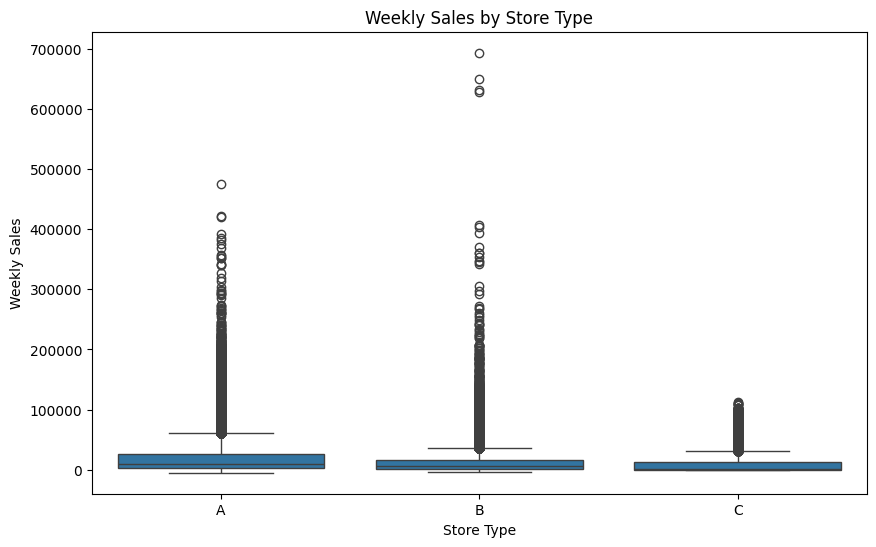

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=train_df)
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

In [20]:
# Drop rows with negative weekly sales
train_df = train_df[train_df['Weekly_Sales'] > 0]

# Create year, month, and week features
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week

# Create a holiday in 1 week lag feature
train_df['Holiday_in_1_week_lag'] = train_df['IsHoliday'].shift(-1).fillna(0)

# Display the first few rows of the modified DataFrame
display(train_df.head())

/tmp/ipython-input-3629732602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Year'] = train_df['Date'].dt.year
/tmp/ipython-input-3629732602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Month'] = train_df['Date'].dt.month
/tmp/ipython-input-3629732602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Season,Month,Year,Week,Holiday_in_1_week_lag
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,...,NaN,NaN,NaN,211.096358,8.106,Winter,2,2010,5,1.0
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,...,NaN,NaN,NaN,211.242170,8.106,Winter,2,2010,6,0.0
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,...,NaN,NaN,NaN,211.289143,8.106,Winter,2,2010,7,0.0
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,...,NaN,NaN,NaN,211.319643,8.106,Winter,2,2010,8,0.0
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,...,NaN,NaN,NaN,211.350143,8.106,Spring,3,2010,9,0.0


In [21]:
from IPython.display import display, HTML

display(HTML('<h2>DataFrame with New Features</h2>'))
display(train_df.head(10))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Season,Month,Year,Week,Holiday_in_1_week_lag
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,...,NaN,NaN,NaN,211.096358,8.106,Winter,2,2010,5,1.0
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,...,NaN,NaN,NaN,211.242170,8.106,Winter,2,2010,6,0.0
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,...,NaN,NaN,NaN,211.289143,8.106,Winter,2,2010,7,0.0
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,...,NaN,NaN,NaN,211.319643,8.106,Winter,2,2010,8,0.0
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,...,NaN,NaN,NaN,211.350143,8.106,Spring,3,2010,9,0.0
5,1,1,2010-03-12,21043.39,0,A,151315,57.79,2.667,NaN,...,NaN,NaN,NaN,211.380643,8.106,Spring,3,2010,10,0.0
6,1,1,2010-03-19,22136.64,0,A,151315,54.58,2.720,NaN,...,NaN,NaN,NaN,211.215635,8.106,Spring,3,2010,11,0.0
7,1,1,2010-03-26,26229.21,0,A,151315,51.45,2.732,NaN,...,NaN,NaN,NaN,211.018042,8.106,Spring,3,2010,12,0.0
8,1,1,2010-04-02,57258.43,0,A,151315,62.27,2.719,NaN,...,NaN,NaN,NaN,210.820450,7.808,Spring,4,2010,13,0.0
9,1,1,2010-04-09,42960.91,0,A,151315,65.86,2.770,NaN,...,NaN,NaN,NaN,210.622857,7.808,Spring,4,2010,14,0.0


In [22]:
# Get all of the holiday dates
holiday_dates = train_df[train_df['IsHoliday'] == 1]['Date'].unique()

# Create a new column to store the weeks until the next holiday
train_df['Weeks_until_next_holiday'] = 0

# For each row in the DataFrame, calculate the number of weeks until the next holiday
for i, row in train_df.iterrows():
    # Get the current date
    current_date = row['Date']

    # Find the next holiday
    next_holiday = None
    for holiday_date in holiday_dates:
        if holiday_date > current_date:
            next_holiday = holiday_date
            break

    # If there is a next holiday, calculate the number of weeks until the holiday
    if next_holiday is not None:
        days_until_holiday = (next_holiday - current_date).days
        weeks_until_holiday = days_until_holiday // 7
        train_df.loc[i, 'Weeks_until_next_holiday'] = weeks_until_holiday

display(train_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Month,Year,Week,Holiday_in_1_week_lag,Weeks_until_next_holiday
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,...,NaN,NaN,211.096358,8.106,Winter,2,2010,5,1.0,1
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,...,NaN,NaN,211.242170,8.106,Winter,2,2010,6,0.0,30
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,...,NaN,NaN,211.289143,8.106,Winter,2,2010,7,0.0,29
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,...,NaN,NaN,211.319643,8.106,Winter,2,2010,8,0.0,28
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,...,NaN,NaN,211.350143,8.106,Spring,3,2010,9,0.0,27


In [27]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

train_df['Season'] = train_df['Date'].dt.month.apply(get_season)

display(train_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Month,Year,Week,Holiday_in_1_week_lag,Weeks_until_next_holiday
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,...,NaN,NaN,211.096358,8.106,Winter,2,2010,5,1.0,1
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,...,NaN,NaN,211.242170,8.106,Winter,2,2010,6,0.0,30
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,...,NaN,NaN,211.289143,8.106,Winter,2,2010,7,0.0,29
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,...,NaN,NaN,211.319643,8.106,Winter,2,2010,8,0.0,28
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,...,NaN,NaN,211.350143,8.106,Spring,3,2010,9,0.0,27


In [24]:

# Read the test data
test_df = pd.read_csv("/content/walmart-recruiting-store-sales-forecasting/test.csv.zip")
test_df = pd.merge(test_df, store_df, on='Store')
test_df = pd.merge(test_df, feature_df, on=['Store', 'Date'])

# Apply the same transformations as the training data
test_df = test_df.drop(columns=['IsHoliday_y'])
test_df = test_df.rename(columns={'IsHoliday_x': 'IsHoliday'})
test_df['IsHoliday'] = test_df['IsHoliday'].astype(int)
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Season'] = test_df['Date'].dt.month.apply(get_season)
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Week'] = test_df['Date'].dt.isocalendar().week
test_df['Holiday_in_1_week_lag'] = test_df['IsHoliday'].shift(-1).fillna(0)

In [28]:
# Get all of the holiday dates
holiday_dates = test_df[test_df['IsHoliday'] == 1]['Date'].unique()

# Create a new column to store the weeks until the next holiday
test_df['Weeks_until_next_holiday'] = 0

# For each row in the DataFrame, calculate the number of weeks until the next holiday
for i, row in test_df.iterrows():
    # Get the current date
    current_date = row['Date']

    # Find the next holiday
    next_holiday = None
    for holiday_date in holiday_dates:
        if holiday_date > current_date:
            next_holiday = holiday_date
            break

    # If there is a next holiday, calculate the number of weeks until the holiday
    if next_holiday is not None:
        days_until_holiday = (next_holiday - current_date).days
        weeks_until_holiday = days_until_holiday // 7
        test_df.loc[i, 'Weeks_until_next_holiday'] = weeks_until_holiday

display(test_df.head())

KeyboardInterrupt: 

In [29]:
test_df

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Year,Month,Week,Holiday_in_1_week_lag,Weeks_until_next_holiday
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,...,3639.90,2737.42,223.462779,6.573,Fall,2012,11,44,0.0,3
1,1,1,2012-11-09,0,A,151315,61.24,3.314,11421.32,3370.89,...,4646.79,6154.16,223.481307,6.573,Fall,2012,11,45,0.0,2
2,1,1,2012-11-16,0,A,151315,52.92,3.252,9696.28,292.10,...,1133.15,6612.69,223.512911,6.573,Fall,2012,11,46,1.0,1
3,1,1,2012-11-23,1,A,151315,56.23,3.211,883.59,4.17,...,209.91,303.32,223.561947,6.573,Fall,2012,11,47,0.0,5
4,1,1,2012-11-30,0,A,151315,52.34,3.207,2460.03,NaN,...,150.57,6966.34,223.610984,6.573,Fall,2012,11,48,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,B,118221,76.05,3.639,4842.29,975.03,...,2449.97,3169.69,NaN,NaN,Summer,2013,6,26,0.0,0
115060,45,98,2013-07-05,0,B,118221,77.50,3.614,9090.48,2268.58,...,5797.47,1514.93,NaN,NaN,Summer,2013,7,27,0.0,0
115061,45,98,2013-07-12,0,B,118221,79.37,3.614,3789.94,1827.31,...,744.84,2150.36,NaN,NaN,Summer,2013,7,28,0.0,0
115062,45,98,2013-07-19,0,B,118221,82.84,3.737,2961.49,1047.07,...,363.00,1059.46,NaN,NaN,Summer,2013,7,29,0.0,0


In [30]:
print("Train Data Distribution:")
display(train_df['Weeks_until_next_holiday'].describe())

print("\nTest Data Distribution:")
display(test_df['Weeks_until_next_holiday'].describe())

Train Data Distribution:


,Weeks_until_next_holiday
count,420212.000000
mean,11.195454
std,9.086292
min,0.000000
25%,3.000000
50%,9.000000
75%,19.000000
max,30.000000



Test Data Distribution:


,Weeks_until_next_holiday
count,115064.000000
mean,0.137888
std,0.712352
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


In [31]:
train_df.to_csv('clean_train_data.csv', index=False)
test_df.to_csv('clean_test_data.csv', index=False)